# Estimating Density

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from tqdm import trange
from unite_toolbox.bin_estimators import calc_bin_density
from unite_toolbox.kde_estimators import calc_kde_density
from unite_toolbox.knn_estimators import calc_knn_density

In [2]:
seeds = 300

In [3]:
# Uniform
label = "uniform"
n_samples = 10_000
dist = stats.uniform(loc=0.5, scale=1.5)

x = np.linspace(start=0.0, stop=2.5, num=500).reshape(-1, 1)
fx = dist.pdf(x)

### Sampling Variability

In [7]:
p_hat_bin = np.empty(shape=(seeds, len(x)))
p_hat_kde = np.empty(shape=(seeds, len(x)))
p_hat_knn = np.empty(shape=(seeds, len(x)))

for i in trange(seeds, ascii=True):
    samples = dist.rvs(size=(n_samples, 1))
    p_hat_bin[i, :] = calc_bin_density(x, samples).flatten()
    p_hat_kde[i, :] = calc_kde_density(x, samples).flatten()
    p_hat_knn[i, :] = calc_knn_density(x, samples, k=50).flatten()

p_bin = np.mean(p_hat_bin, axis=0)
p_bin_hdi = np.quantile(p_hat_bin, [0.05, 0.95], axis=0)

p_kde = np.mean(p_hat_kde, axis=0)
p_kde_hdi = np.quantile(p_hat_kde, [0.05, 0.95], axis=0)

p_knn = np.mean(p_hat_knn, axis=0)
p_knn_hdi = np.quantile(p_hat_knn, [0.05, 0.95], axis=0)

100%|##########| 300/300 [00:23<00:00, 12.61it/s]


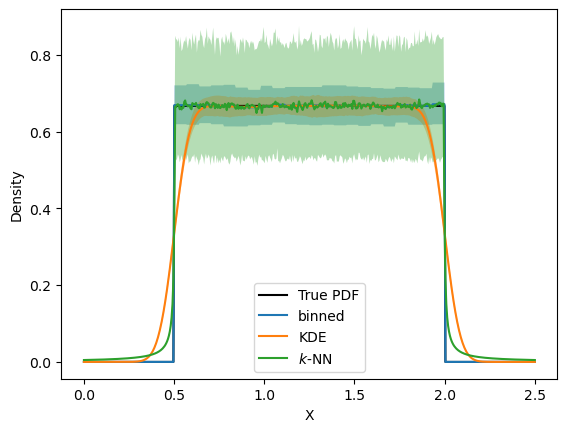

In [8]:
fig, ax = plt.subplots()

ax.plot(x, fx, marker="", color="k", label="True PDF")

ax.plot(x, p_bin, marker="", label="binned")
ax.fill_between(x.flatten(), p_bin_hdi[0], p_bin_hdi[1], alpha=.35)


ax.plot(x, p_kde, marker="", label="KDE")
ax.fill_between(x.flatten(), p_kde_hdi[0], p_kde_hdi[1], alpha=.35)

ax.plot(x, p_knn, marker="", label="$k$-NN")
ax.fill_between(x.flatten(), p_knn_hdi[0], p_knn_hdi[1], alpha=.35)

ax.set_xlabel("X")
ax.set_ylabel("Density")
ylims = ax.get_ylim()
ax.legend()
# plt.savefig("evaluation/plots/" + "pdf-" + label + ".pdf", dpi=300)
plt.show()